# Data Scientist Job (Glassdoor) Data Analysis

## Information

In this project I scraped job postings related to the position of 'Data Scientist' from www.glassdoor.com. This project is inspired by Ken Jee (https://github.com/PlayingNumbers). I have used a modified version of Ken Jee's selenium code because that code was not working raw for me. Selenium was used because it has small chance of getting caught by glassdoor as it mimics a human kind of interaction. Sending too many request could still increase chances of getting IP block which limited the dataset to only 1000 jobs.

With each job, we got the following:

- Job title
- Salary Estimate
- Job Description
- Rating
- Company
- Location
- Company Headquarters
- Company Size
- Company Founded Date
- Type of Ownership
- Industry
- Sector
- Revenue
- Competitors

Columns with value -1 mean data scraping was unsuccessful for that job.

## About Glassdoor

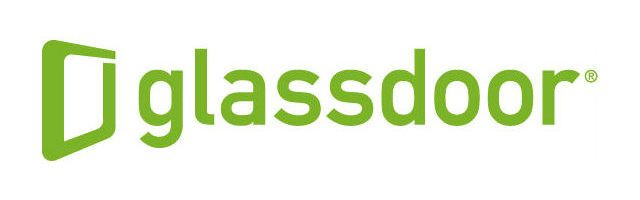

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "image.jpg", width=400, height=200)

Glassdoor is a website where current and former employees anonymously review companies. Glassdoor also allows users to anonymously submit and view salaries as well as search and apply for jobs on its platform.Glassdoor launched its site in 2008 , as a site that “collects company reviews and real salaries from employees of large companies and displays them anonymously for all members to see,” according to TechCrunch. The company then averaged the reported salaries, posting these averages alongside the reviews employees made of the management and culture of the companies they worked for—including some of the larger tech companies like Google and Yahoo. The site also allows the posting of office photographs and other company-relevant media.

## Information about the Dataset
1. Job Title: The title of job, eg. Data scientist, junior data scientist, senior data scientist etc.
2. Salary Estimate: Range of salary and the source.
3. Job Description: Tells us what is expected out of the job title.
4. Rating: It gives the rating of the company
5. Company Name: Name of the company
6. Location: Location of the job
7. Headquarters: location of headquarter of the company
8. Size: Range of number of employee working in the company
9. Founded: Company founded in Year
10. Type of ownership: Tells us if the company is private, public or government owned.
11. Industry: Industry of the company
12. Sector: Sector in which company works
13. Revenue: Total revennue of the company per year
14. Competitors: Current competitor of the company in the same sector

## Credits
1. Ken Jee - https://github.com/PlayingNumbers
2. Echestare - https://github.com/echestare/001KenJeeFromScratch_DSSalary

## (A) Data cleaning

1. Load the file using pandas library
2. Cleaning the dataset

## 1. Importing libraries and loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly

In [ ]:
df = pd.read_csv("data_scraped_2020.csv")
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
#Dropping the unnamed column
df= df.drop(["Unnamed: 0"],axis=1)

## 2. Parsing numeric data out of salary column as Lower salary, Upper Salary and Average Salary


In [ ]:
# We have few -1 values in the Salary Estimate column. Lets try to remove those -1 values first. 
#Remember -1 is because the scrapper was not able to get the value for it or it was not even present on glasdoor.

df["Salary Estimate"] = df["Salary Estimate"].replace("-1",np.nan)
df = df.dropna()

In [ ]:
#Resetting the index.
df = df.reset_index()

In [ ]:
#Next we separate the hourly salary and employer provided salary from the Salary estimate Column, to be used later
df["Hourly"]= df["Salary Estimate"].apply(lambda x: 1 if "per hour" in x.lower() else 0)
df["Employer provided"]= df["Salary Estimate"].apply(lambda x: 1 if "employer provided" in x.lower() else 0)

In [ ]:
# Lets correct Salary Estimate column
# First try to remove the source of salary
salary = df["Salary Estimate"].apply(lambda x: x.split("(")[0])

In [ ]:
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
737    $58K-$111K 
738    $72K-$133K 
739     $56K-$91K 
740    $95K-$160K 
741    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

In [ ]:
#                             OR
#salary = df["Salary Estimate"].str.split("(",1,expand=True)
#salary[0]

In [ ]:
#Now, we remove the K, $ sign, per hour and employer provided salary strings
salary = salary.str.replace("K","")
salary = salary.str.replace("$","")

In [ ]:
salary = salary.apply(lambda x: x.lower().replace("per hour",""))
salary = salary.apply(lambda x: x.lower().replace("employer provided salary:",""))


In [ ]:
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
737    58-111 
738    72-133 
739     56-91 
740    95-160 
741    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [ ]:
#Here, we split the salary into lower and upper salary
sal = salary.str.split("-",1,expand=True).rename(columns=({0:"Lower",1:"Upper"}))
sal

,Lower,Upper
0,53,91
1,63,112
2,80,90
3,56,97
4,86,143
...,...,...
737,58,111
738,72,133
739,56,91
740,95,160


In [ ]:
#Making them numeric and adding into the main data frame df
sal.Lower = pd.to_numeric(sal.Lower)
sal.Upper = pd.to_numeric(sal.Upper)
df["Lower Salary"] = sal.Lower
df["Upper Salary"] = sal.Upper

In [ ]:
#Now, I convert the hourly rate into a yearly salary. Assuming 52 week year and 40 hour work week, divided by 1000 to convert into K format.
df['Lower Salary']= df.apply(lambda x: x['Lower Salary'] if x['Hourly']==0 else (int)(x['Lower Salary']*40*52/1000), axis = 1)
df['Upper Salary']= df.apply(lambda x: x['Upper Salary'] if x['Hourly']==0 else (int)(x['Upper Salary']*40*52/1000), axis = 1)

In [ ]:
#Now, We can find the average salary
df["Avg Salary(K)"] = (df["Lower Salary"]+df["Upper Salary"])/2

In [ ]:
df.head(1)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K)
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0


## 3. Parsing rating out of company text and removing undesired characters.

Taking into account that the Company_Name  column has not only the name of the company, but also the information of the ratings, it is necessary to remove ir the latter.

Finally, the rating (when exist) has 3 characters (number dot number)
So, the next line is telling that when the Rating column has a value greater than zero, the company name will have 3 characters removed.

In [ ]:
df['company_txt']= df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3], axis = 1)

In [ ]:
#Each cell in the newly made company_txt coplumn has "\n" characters at the end. We should remove it.
df["company_txt"] = df["company_txt"].str[:-1]
#or df["company_txt"] = df["company_txt"].str.replace("\n","")


## 4. Making a new column for company state and cleaning it.

In [ ]:
job = df["Location"].str.split(",",1,expand=True)
job[1]

0       NM
1       MD
2       FL
3       WA
4       NY
      ... 
737     MA
738     TN
739     PA
740     PA
741     OH
Name: 1, Length: 742, dtype: object

In [ ]:
#Create a Job Location column in the main dataframe.
df["Job Location"] = job[1]

In [ ]:
#Lets look at how the job is distributed among states
df["Job Location"].value_counts()

 CA                 151
 MA                 103
 NY                  72
 VA                  41
 IL                  40
 MD                  35
 PA                  33
 TX                  28
 WA                  21
 NC                  21
 NJ                  17
 FL                  16
 OH                  14
 TN                  13
 CO                  11
 DC                  11
 UT                  10
 IN                  10
 WI                  10
 MO                   9
 AZ                   9
 AL                   8
 MI                   6
 DE                   6
 GA                   6
 KY                   6
 CT                   5
 IA                   5
 NE                   4
 OR                   4
 LA                   4
 NM                   3
 KS                   3
 MN                   2
 ID                   2
 Los Angeles, CA      1
 SC                   1
 RI                   1
Name: Job Location, dtype: int64

In [ ]:
#Lets check for any spaces before the State codes
len(df["Job Location"][0])
#We see that the length is 3 but it should be 2

3

In [ ]:
#Here, we removed the space at the end of the state
df["Job Location"] = df["Job Location"].str[1:3]

In [ ]:
#Here, we see that there is an error in last 2rd row, Los angeles should not be there, we should remove it.
#In step before this, we made the Los Angeles, CA into Lo, so we convert Lo to CA
df["Job Location"] = df["Job Location"].replace("Lo","CA")



In [ ]:
#Lets check the counts again
df["Job Location"].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
IN     10
UT     10
MO      9
AZ      9
AL      8
MI      6
DE      6
KY      6
GA      6
IA      5
CT      5
OR      4
LA      4
NE      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: Job Location, dtype: int64

Notice, how the CA state now has 152 counts instead of 151 because Los Angeles city is in CA (thats what we did above).

List of U.S. States with Abbreviations: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971

## 5. Age of the company

In [ ]:
# We need to transform the Founded column into the age of the company.
df["Age"] = df["Founded"].apply(lambda x: x if x<1 else 2021 - x)
#Age of the company as of now (2021)

In [ ]:
df["Age"].head(3)

0    48
1    37
2    11
Name: Age, dtype: int64

## 6. Extracting essential skills from the Job description column

In [ ]:
# Lets extract the skills(Python,r,mongo,spark,julia,sql,sas,excel etc) the company wants in a Data Scientist

# Python 
df["Python"] = df["Job Description"].apply(lambda x: 1 if "python" in x.lower() else 0)

In [ ]:
df.Python.value_counts()

1    392
0    350
Name: Python, dtype: int64

In [ ]:
# r-studio
df["R-studio"] = df["Job Description"].apply(lambda x: 1 if "r-studio" in x.lower() or "r studio" in x.lower() else 0)
df["R-studio"].value_counts()

0    740
1      2
Name: R-studio, dtype: int64

It looks like it is too small to make any insights from this. We can just delete this column from the database

In [ ]:
df = df.drop("R-studio",axis=1)

In [ ]:
#spark
df['spark']  = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.spark.value_counts()

0    575
1    167
Name: spark, dtype: int64

In [ ]:

#aws
df['aws']  = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.aws.value_counts()

0    566
1    176
Name: aws, dtype: int64

In [ ]:
#excel
df['excel']  = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()

1    388
0    354
Name: excel, dtype: int64

In [ ]:
#sql
df['sql']  = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df.sql.value_counts()

1    380
0    362
Name: sql, dtype: int64

In [ ]:
#sas 
df['sas']  = df['Job Description'].apply(lambda x: 1 if (' sas ' in x.lower() or ' sas,' in x.lower() or ' sas.' in x.lower())  else 0)
df.sas.value_counts()

0    676
1     66
Name: sas, dtype: int64

In [ ]:
#julia
df['julia']  = df['Job Description'].apply(lambda x: 1 if 'julia' in x.lower() else 0)
df.julia.value_counts()

0    742
Name: julia, dtype: int64

Zero requirement for Julia in any company. So, we drop this column.

In [ ]:
df = df.drop("julia",axis=1)

In [ ]:
#keras
df['keras']  = df['Job Description'].apply(lambda x: 1 if 'keras' in x.lower() else 0)
df.keras.value_counts()

0    713
1     29
Name: keras, dtype: int64

In [ ]:
#pytorch
df['pytorch']  = df['Job Description'].apply(lambda x: 1 if 'pytorch' in x.lower() else 0)
df.pytorch.value_counts()

0    703
1     39
Name: pytorch, dtype: int64

In [ ]:
#scikit-learn
df['scikit']  = df['Job Description'].apply(lambda x: 1 if 'scikit' in x.lower() else 0)
df.scikit.value_counts()

0    688
1     54
Name: scikit, dtype: int64

In [ ]:
#tensor
df['tensor']  = df['Job Description'].apply(lambda x: 1 if 'tensor' in x.lower() else 0)
df.tensor.value_counts()

0    670
1     72
Name: tensor, dtype: int64

In [ ]:
#selenium
df['selenium']  = df['Job Description'].apply(lambda x: 1 if 'selenium' in x.lower() else 0)
df.selenium.value_counts()

0    739
1      3
Name: selenium, dtype: int64

In [ ]:
#Zero requirement for Julia in any company. So, we drop this column.
df = df.drop("selenium",axis=1)

In [ ]:
#hadoop
df['hadoop']  = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
df.hadoop.value_counts()

0    618
1    124
Name: hadoop, dtype: int64

In [ ]:
#tableau
df['tableau']  = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df.tableau.value_counts()

0    594
1    148
Name: tableau, dtype: int64

In [ ]:
#power bi
df['bi']  = df['Job Description'].apply(lambda x: 1 if ('power bi' in x.lower() or 'powerbi' in x.lower()) else 0)
df.bi.value_counts()

0    686
1     56
Name: bi, dtype: int64

In [ ]:
#apache flink
df['flink']  = df['Job Description'].apply(lambda x: 1 if 'flink' in x.lower() else 0)
df.flink.value_counts()

0    732
1     10
Name: flink, dtype: int64

In [ ]:
#mongo db
df['mongo']  = df['Job Description'].apply(lambda x: 1 if 'mongo' in x.lower() else 0)
df.mongo.value_counts()

0    705
1     37
Name: mongo, dtype: int64

In [ ]:
#google analytics
df['google_an']  = df['Job Description'].apply(lambda x: 1 if 'google analytics' in x.lower() else 0)
df.google_an.value_counts()

0    728
1     14
Name: google_an, dtype: int64

In [ ]:
df.head(1)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0


## 7. Job Title simplified.

In [ ]:
#Looking at this, we find there are many job titles
df["Job Title"].unique()[0:5]

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst'], dtype=object)

In [ ]:
#Instead of just Data scientist job title, we have job title related to the data science field like ML engineer, data analist etc.
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'Data scientist project manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'scientist' in title.lower():
        return 'other scientist'
    elif 'data modeler' in title.lower():
        return 'data modeler'
    elif 'data' and 'anal' in title.lower():
        return 'data analitics'
    else:
        return 'na'  #not applicable

In [ ]:
df['job_title_sim'] = df['Job Title'].apply(title_simplifier)
df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
director                            5
data modeler                        5
Name: job_title_sim, dtype: int64

### By looking at the Job Description column, we can also classify these jobs into different seniority levels.

In [ ]:
#This function looks for the seniority asked in the title of each job asking (Job Title column)
def seniority(title):
    if 's.sr' in title.lower() or 's. sr' in title.lower() or 's sr' in title.lower() or 'ssr' in title.lower() or 's. senior' in title.lower() or 'semi or' in title.lower() or 'middle' in title.lower() or 'mid' in title.lower():
        return 'ssr'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    elif 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    else:
        return 'na'

In [ ]:
df['seniority_by_title'] = df['Job Title'].apply(seniority)
df.seniority_by_title.value_counts()

na    519
sr    220
jr      3
Name: seniority_by_title, dtype: int64

## 8. Size, Ownership and Revenue column corrections

In [ ]:
#Lets remove "employees" from size column
df["Size"] = df["Size"].apply(lambda x: x.lower().replace("employees",""))
df["Size"] = df["Size"].apply(lambda x: x.lower().replace(" to "," - "))
df["Size"] = df["Size"].apply(lambda x: x.lower().replace("-1","unknown"))

In [ ]:
df.Size.unique()

array(['501 - 1000 ', '10000+ ', '1001 - 5000 ', '51 - 200 ',
       '201 - 500 ', '5001 - 10000 ', '1 - 50 ', 'unknown'], dtype=object)

In [ ]:
#Revenue
df['Revenue'] = df['Revenue'].apply(lambda x: 'Unknown / Non-Applicable' if '-1' in x.lower() else x)
df['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [ ]:
# Type of ownership 
df['Type of ownership'] = df['Type of ownership'].apply(lambda x: 'Other Organization' if 'unknown' in x.lower() else ('Other Organization' if '-1' in x.lower() else x))
df['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

## 9. Degree column

It will tell us if the company has any experience credits for Masters or a Ph.D. degree.

In [68]:
df["Job Description"][0]

'Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data

In [72]:
#This function looks for the education degree (Maters or PhD) experience credits in the Job Description column.
def education_credit(degree):
    if 'master' in degree.lower() or 'masters' in degree.lower() or "master's" in degree.lower():
        return 'M'
    elif 'phd' in degree.lower() or 'ph.d' in degree.lower():
        return 'P'
    else:
        return 'na'

In [73]:
df['Degree'] = df['Job Description'].apply(education_credit)
df.Degree.value_counts()

na    383
M     252
P     107
Name: Degree, dtype: int64

A good number (48%) of companies give experience credits for Masters or PhD degree.

In [74]:
#We are done with the data cleaning. Lets export the adataset into another csv file.
df_out=df
#df_out.to_csv('data_cleaned_2020.csv',index=False)
df_out.to_csv('data_cleaned_2021.csv',index=False)

#Checking if the database was exported correctly:
#pd.read_csv('data_cleaned_2020.csv')